### Contact Energies
For varying contact energies for the collective cell structure model, we analyzed our simulated results as follows:

In [1]:
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
from matplotlib.patches import Patch, Rectangle
import pandas as pd

# NEW Analysis

### 7.0 days

In [2]:
# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 7 days
    filtered_data = all_data[all_data['days'] <= 7]

    return filtered_data

In [3]:
# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the mean of circularity and cell invasion
network_avg = network_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()
spheroid_avg = spheroid_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()
# network_min = network_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].min().reset_index()
# spheroid_min = spheroid_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].min().reset_index()

In [4]:
spheroid_avg.head(10)

,days,folder_index,circularity,cell_invasion
0,0.000,1,1.000000,7.227699
1,0.000,5,1.000000,7.347103
2,0.000,10,1.000000,9.830417
3,0.000,15,1.000000,10.946516
4,0.000,20,1.000000,11.380155
5,0.000,25,1.000000,11.374321
6,0.001,1,0.885616,9.826933
7,0.001,5,0.882683,10.030001
8,0.001,10,0.842229,13.401321
9,0.001,15,0.824025,14.888730


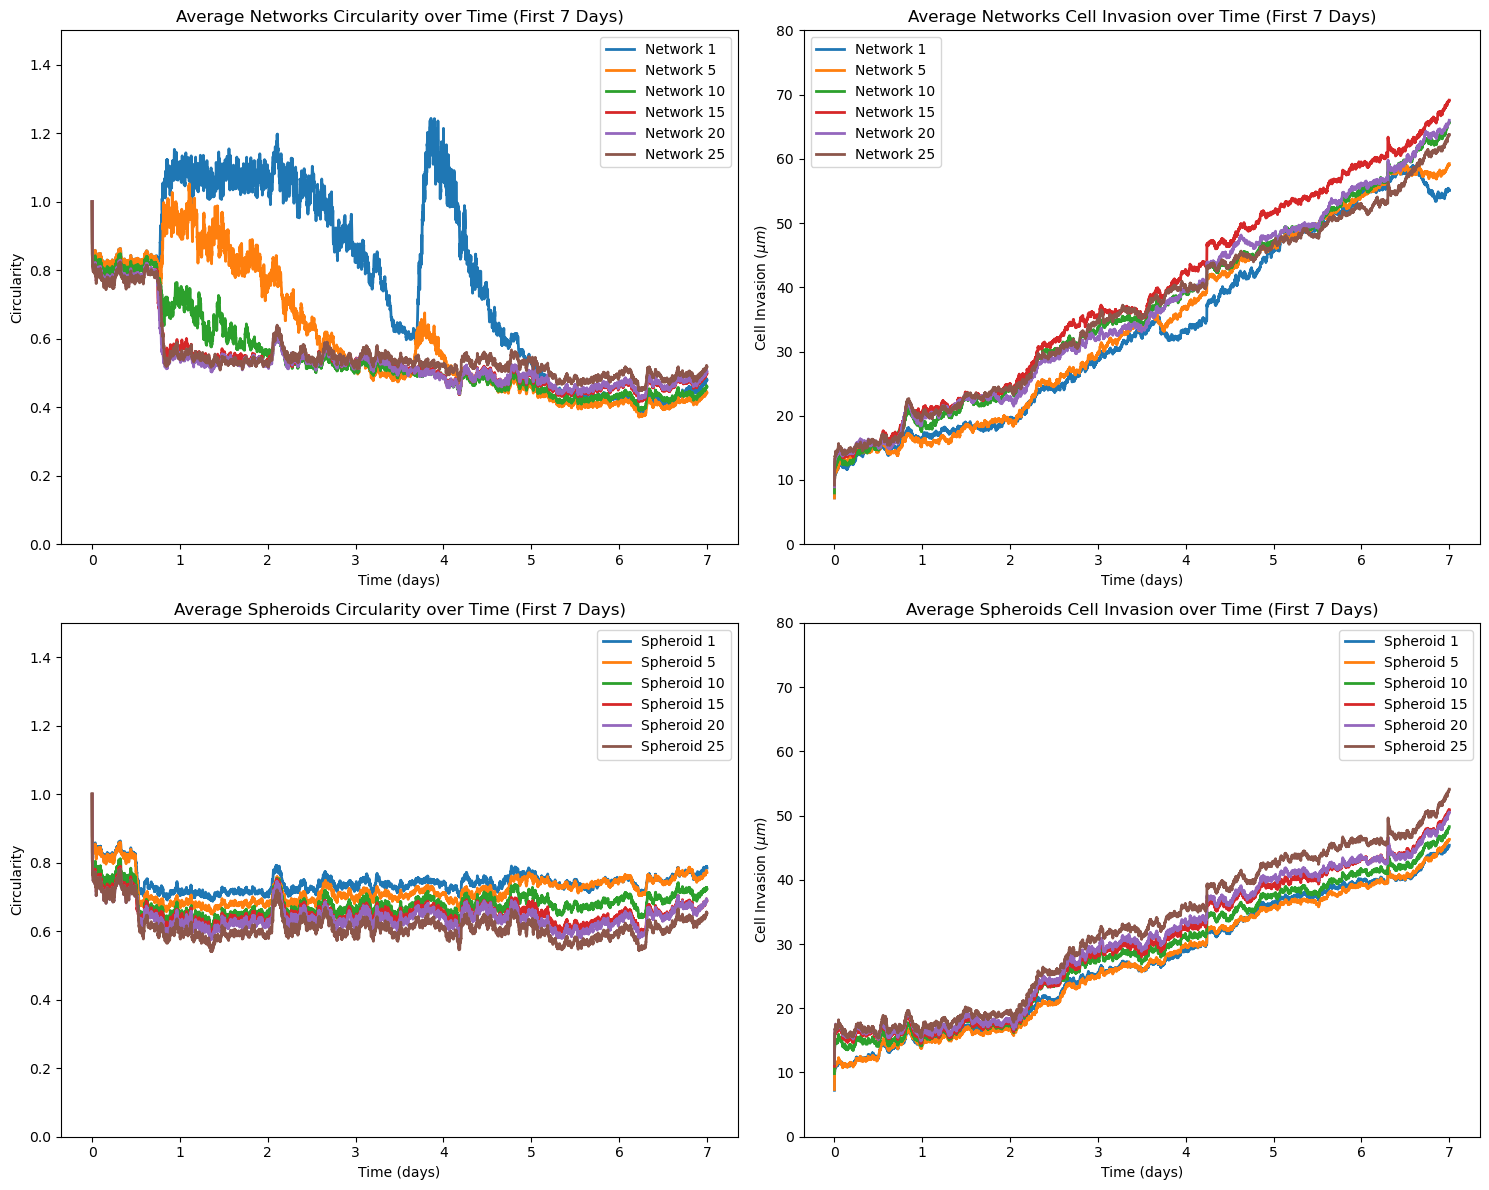

In [5]:
# Plotting the average values

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Average Networks Circularity over Time (First 7 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 0].plot(subset['days'], subset['circularity'], label=f'Network {n}', linewidth=2)
ax[0, 0].legend()
ax[0, 0].set_ylim([0.0, 1.5])
#ax[0, 0].grid(True)

# Plot for Networks Cell Invasion
ax[0, 1].set_title('Average Networks Cell Invasion over Time (First 7 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 1].plot(subset['days'], subset['cell_invasion'], label=f'Network {n}', linewidth=2)
ax[0, 1].legend()
ax[0, 1].set_ylim([0.0, 80.0])
#ax[0, 1].grid(True)

# Plot for Spheroids Circularity
ax[1, 0].set_title('Average Spheroids Circularity over Time (First 7 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 0].plot(subset['days'], subset['circularity'], label=f'Spheroid {n}', linewidth=2)
ax[1, 0].legend()
ax[1, 0].set_ylim([0.0, 1.5])
#ax[1, 0].grid(True)

# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Average Spheroids Cell Invasion over Time (First 7 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 1].plot(subset['days'], subset['cell_invasion'], label=f'Spheroid {n}', linewidth=2)
ax[1, 1].legend()
ax[1, 1].set_ylim([0.0, 80.0])
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('avg_circularity_cell_invasion_networks_spheroids_plot_7_days.png', dpi=300, bbox_inches='tight')
plt.show()


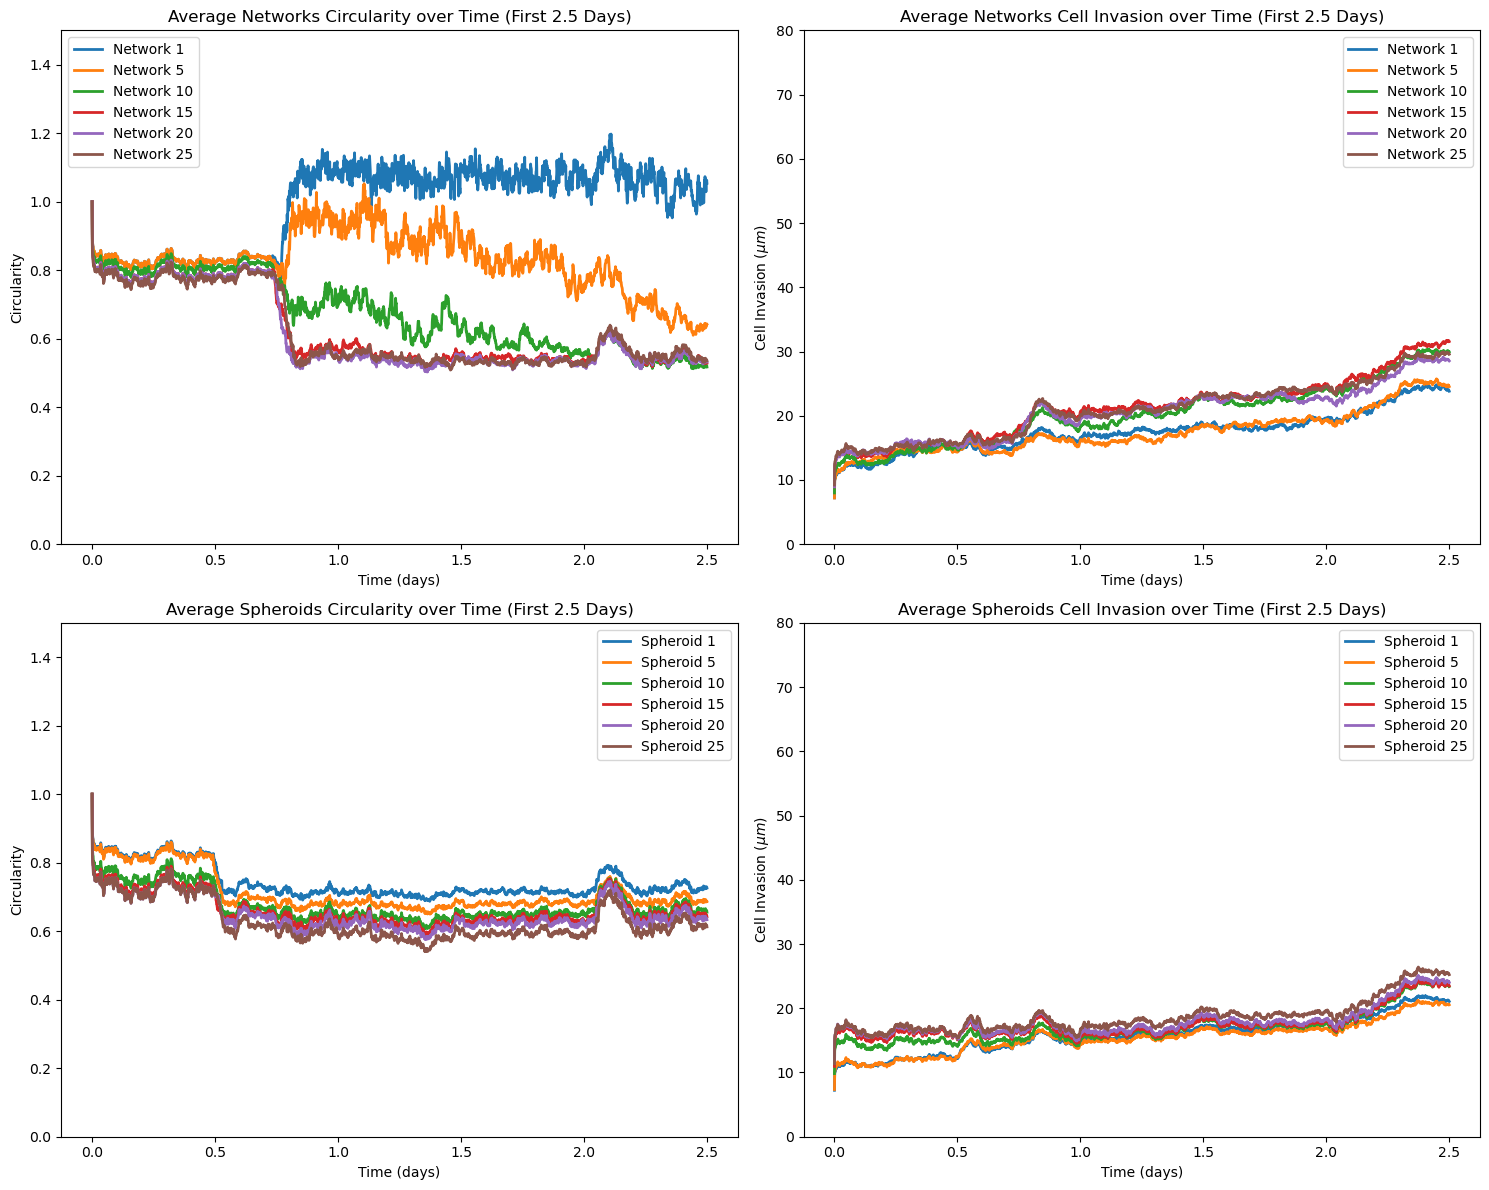

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days
    filtered_data = all_data[all_data['days'] <= 2.5]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the mean of circularity and cell invasion
network_avg = network_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()
spheroid_avg = spheroid_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()

# Plotting the average values

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Average Networks Circularity over Time (First 2.5 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 0].plot(subset['days'], subset['circularity'], label=f'Network {n}', linewidth=2)
ax[0, 0].legend()
ax[0, 0].set_ylim([0.0, 1.5])
#ax[0, 0].grid(True)

# Plot for Networks Cell Invasion
ax[0, 1].set_title('Average Networks Cell Invasion over Time (First 2.5 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 1].plot(subset['days'], subset['cell_invasion'], label=f'Network {n}', linewidth=2)
ax[0, 1].legend()
ax[0, 1].set_ylim([0.0, 80.0])
#ax[0, 1].grid(True)

# Plot for Spheroids Circularity
ax[1, 0].set_title('Average Spheroids Circularity over Time (First 2.5 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 0].plot(subset['days'], subset['circularity'], label=f'Spheroid {n}', linewidth=2)
ax[1, 0].legend()
ax[1, 0].set_ylim([0.0, 1.5])
#ax[1, 0].grid(True)

# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Average Spheroids Cell Invasion over Time (First 2.5 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 1].plot(subset['days'], subset['cell_invasion'], label=f'Spheroid {n}', linewidth=2)
ax[1, 1].legend()
ax[1, 1].set_ylim([0.0, 80.0])
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('avg_circularity_cell_invasion_networks_spheroids_plot.png', dpi=300, bbox_inches='tight')
plt.show()


7days

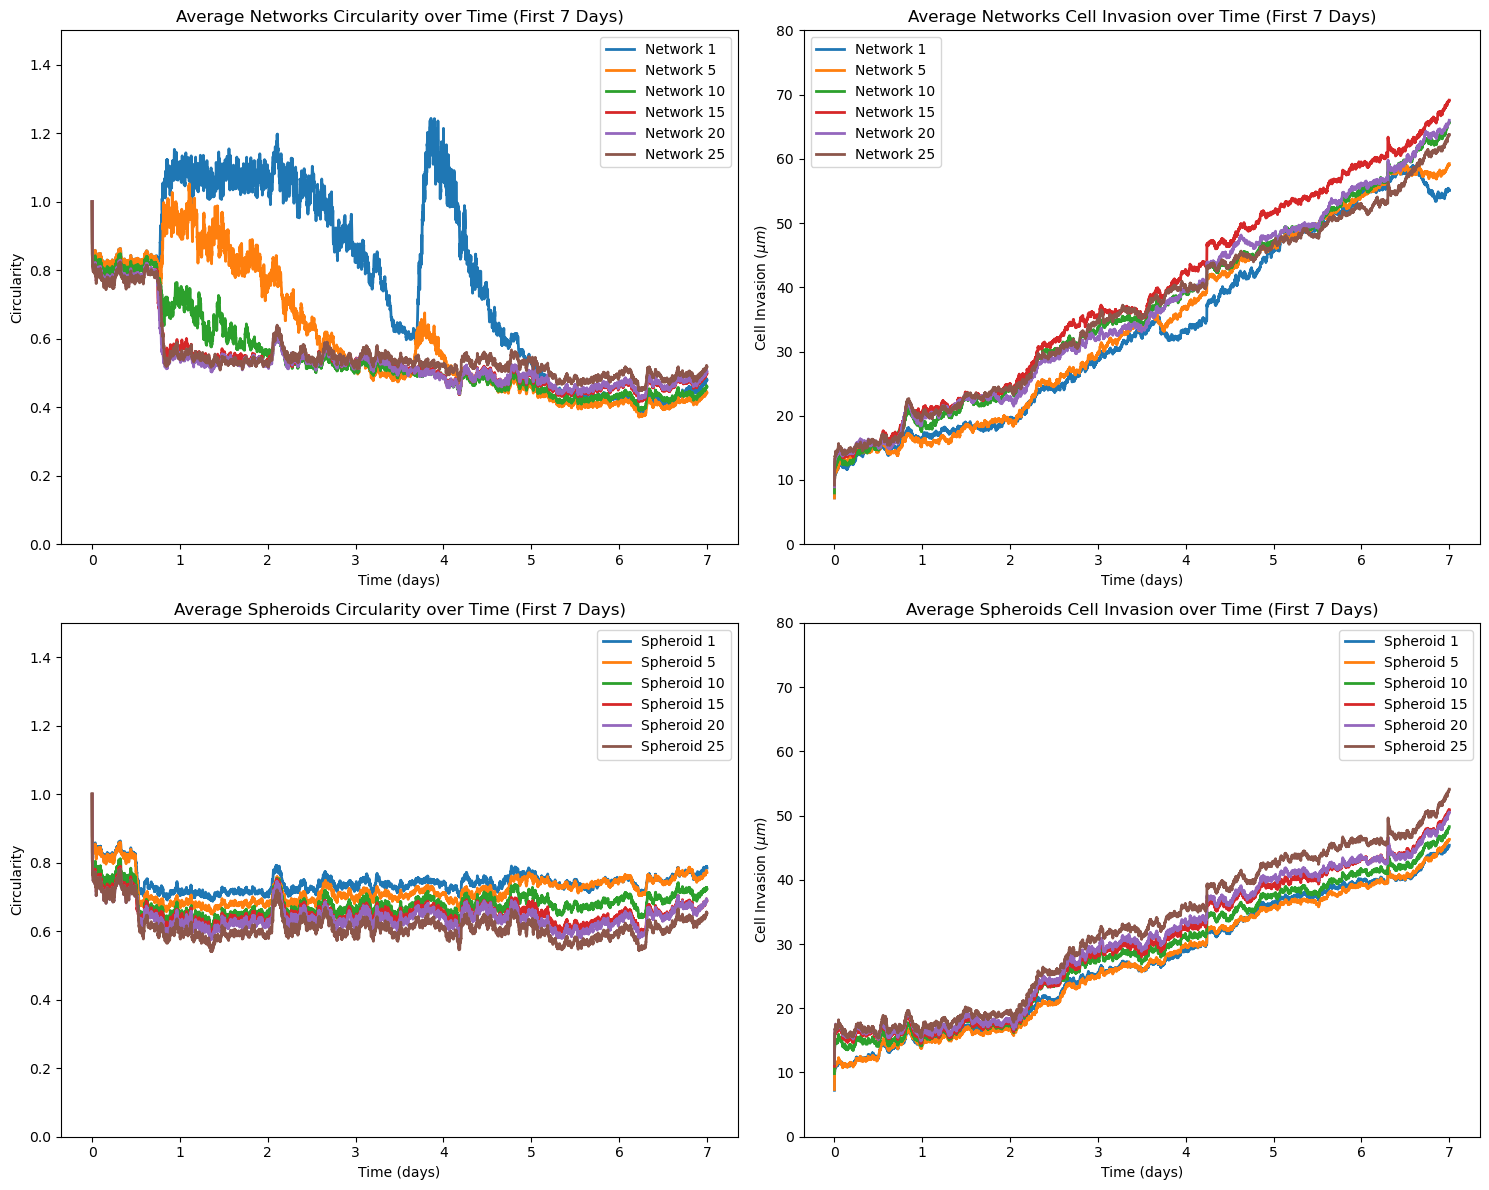

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days
    filtered_data = all_data[all_data['days'] <= 7]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the mean of circularity and cell invasion
network_avg = network_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()
spheroid_avg = spheroid_data.groupby(['days', 'folder_index'])[['circularity', 'cell_invasion']].mean().reset_index()

# Plotting the average values

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Average Networks Circularity over Time (First 7 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 0].plot(subset['days'], subset['circularity'], label=f'Network {n}', linewidth=2)
ax[0, 0].legend()
ax[0, 0].set_ylim([0.0, 1.5])
#ax[0, 0].grid(True)

# Plot for Networks Cell Invasion
ax[0, 1].set_title('Average Networks Cell Invasion over Time (First 7 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_avg[network_avg['folder_index'] == n]
    ax[0, 1].plot(subset['days'], subset['cell_invasion'], label=f'Network {n}', linewidth=2)
ax[0, 1].legend()
ax[0, 1].set_ylim([0.0, 80.0])
#ax[0, 1].grid(True)

# Plot for Spheroids Circularity
ax[1, 0].set_title('Average Spheroids Circularity over Time (First 7 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 0].plot(subset['days'], subset['circularity'], label=f'Spheroid {n}', linewidth=2)
ax[1, 0].legend()
ax[1, 0].set_ylim([0.0, 1.5])
#ax[1, 0].grid(True)

# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Average Spheroids Cell Invasion over Time (First 7 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_avg[spheroid_avg['folder_index'] == n]
    ax[1, 1].plot(subset['days'], subset['cell_invasion'], label=f'Spheroid {n}', linewidth=2)
ax[1, 1].legend()
ax[1, 1].set_ylim([0.0, 80.0])
#ax[1, 1].grid(True)

plt.tight_layout()
plt.savefig('avg_circularity_cell_invasion_networks_spheroids_plot7.png', dpi=300, bbox_inches='tight')
plt.show()


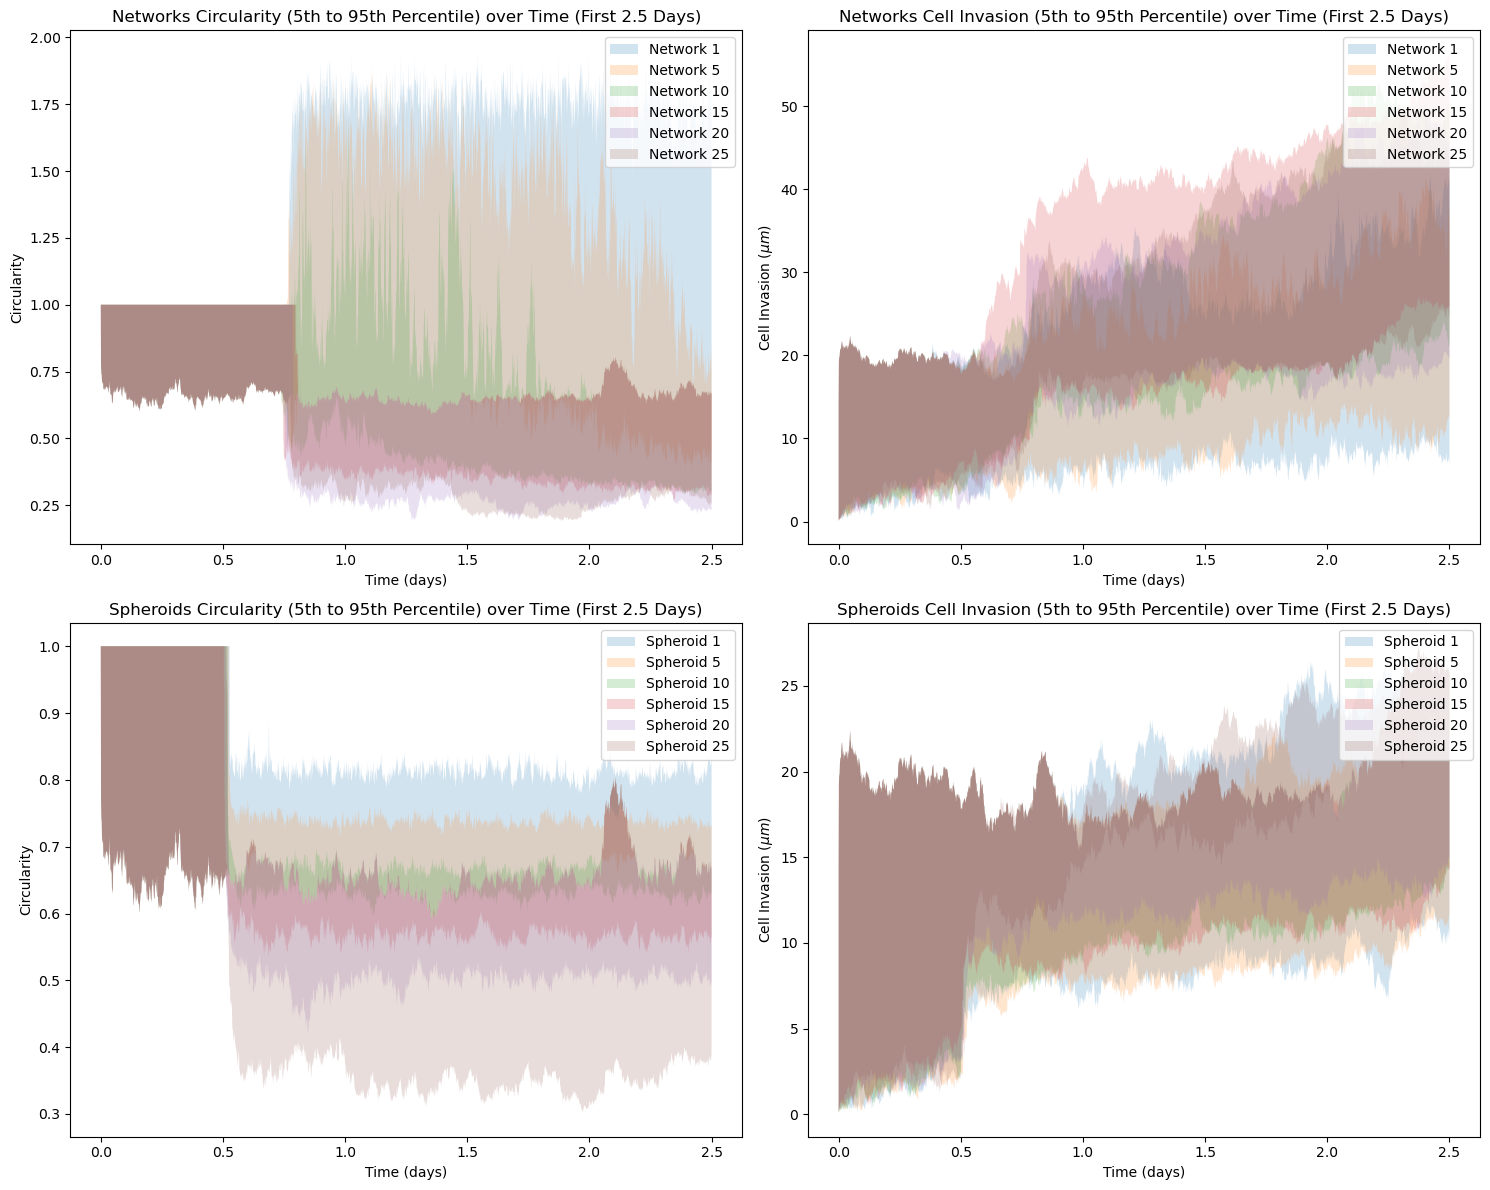

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days
    filtered_data = all_data[all_data['days'] <= 2.5]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the 5th and 95th percentiles of circularity and cell invasion
network_percentiles = network_data.groupby(['days', 'folder_index']).agg(
    circularity_5th=('circularity', lambda x: np.percentile(x, 5)),
    circularity_95th=('circularity', lambda x: np.percentile(x, 95)),
    cell_invasion_5th=('cell_invasion', lambda x: np.percentile(x, 5)),
    cell_invasion_95th=('cell_invasion', lambda x: np.percentile(x, 95))
).reset_index()

spheroid_percentiles = spheroid_data.groupby(['days', 'folder_index']).agg(
    circularity_5th=('circularity', lambda x: np.percentile(x, 5)),
    circularity_95th=('circularity', lambda x: np.percentile(x, 95)),
    cell_invasion_5th=('cell_invasion', lambda x: np.percentile(x, 5)),
    cell_invasion_95th=('cell_invasion', lambda x: np.percentile(x, 95))
).reset_index()

# Plotting the 5th to 95th percentile ranges

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Networks Circularity (5th to 95th Percentile) over Time (First 2.5 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_percentiles[network_percentiles['folder_index'] == n]
    ax[0, 0].fill_between(subset['days'], subset['circularity_5th'], subset['circularity_95th'], alpha=0.2, label=f'Network {n}')
ax[0, 0].legend()


# Plot for Networks Cell Invasion
ax[0, 1].set_title('Networks Cell Invasion (5th to 95th Percentile) over Time (First 2.5 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_percentiles[network_percentiles['folder_index'] == n]
    ax[0, 1].fill_between(subset['days'], subset['cell_invasion_5th'], subset['cell_invasion_95th'], alpha=0.2, label=f'Network {n}')
ax[0, 1].legend()


# Plot for Spheroids Circularity
ax[1, 0].set_title('Spheroids Circularity (5th to 95th Percentile) over Time (First 2.5 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_percentiles[spheroid_percentiles['folder_index'] == n]
    ax[1, 0].fill_between(subset['days'], subset['circularity_5th'], subset['circularity_95th'], alpha=0.2, label=f'Spheroid {n}')
ax[1, 0].legend()


# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Spheroids Cell Invasion (5th to 95th Percentile) over Time (First 2.5 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_percentiles[spheroid_percentiles['folder_index'] == n]
    ax[1, 1].fill_between(subset['days'], subset['cell_invasion_5th'], subset['cell_invasion_95th'], alpha=0.2, label=f'Spheroid {n}')
ax[1, 1].legend()


plt.tight_layout()
plt.savefig('percentile_circularity_cell_invasion_networks_spheroids_plot.png', dpi=300, bbox_inches='tight')
plt.show()



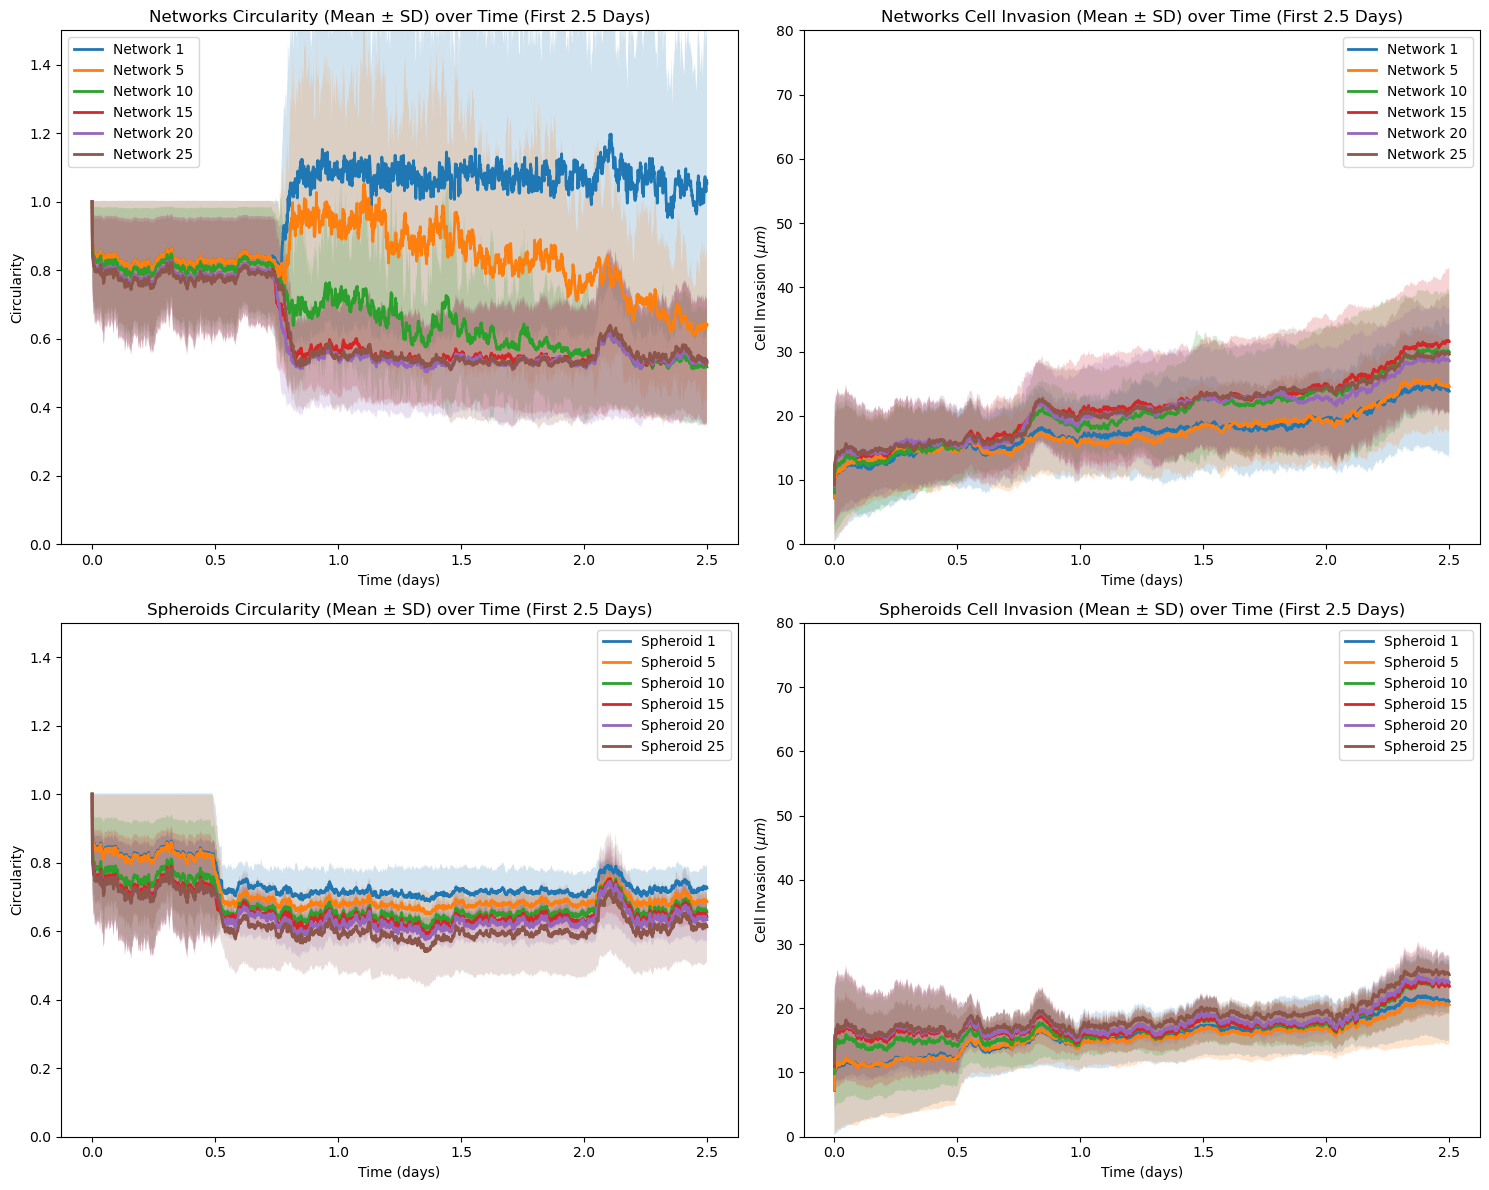

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days
    filtered_data = all_data[all_data['days'] <= 2.5]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the mean and standard deviation
network_stats = network_data.groupby(['days', 'folder_index']).agg(
    circularity_mean=('circularity', 'mean'),
    circularity_std=('circularity', 'std'),
    cell_invasion_mean=('cell_invasion', 'mean'),
    cell_invasion_std=('cell_invasion', 'std')
).reset_index()

spheroid_stats = spheroid_data.groupby(['days', 'folder_index']).agg(
    circularity_mean=('circularity', 'mean'),
    circularity_std=('circularity', 'std'),
    cell_invasion_mean=('cell_invasion', 'mean'),
    cell_invasion_std=('cell_invasion', 'std')
).reset_index()

# Plotting the mean and standard deviation

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Networks Circularity (Mean ± SD) over Time (First 2.5 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_stats[network_stats['folder_index'] == n]
    ax[0, 0].plot(subset['days'], subset['circularity_mean'], label=f'Network {n}', linewidth=2)
    ax[0, 0].fill_between(subset['days'], 
                          subset['circularity_mean'] - subset['circularity_std'], 
                          subset['circularity_mean'] + subset['circularity_std'], 
                          alpha=0.2)

ax[0, 0].legend()
ax[0, 0].set_ylim([0.0, 1.5])

# Plot for Networks Cell Invasion
ax[0, 1].set_title('Networks Cell Invasion (Mean ± SD) over Time (First 2.5 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_stats[network_stats['folder_index'] == n]
    ax[0, 1].plot(subset['days'], subset['cell_invasion_mean'], label=f'Network {n}', linewidth=2)
    ax[0, 1].fill_between(subset['days'], 
                          subset['cell_invasion_mean'] - subset['cell_invasion_std'], 
                          subset['cell_invasion_mean'] + subset['cell_invasion_std'], 
                          alpha=0.2)

ax[0, 1].legend()
ax[0, 1].set_ylim([0.0, 80.0])

# Plot for Spheroids Circularity
ax[1, 0].set_title('Spheroids Circularity (Mean ± SD) over Time (First 2.5 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_stats[spheroid_stats['folder_index'] == n]
    ax[1, 0].plot(subset['days'], subset['circularity_mean'], label=f'Spheroid {n}', linewidth=2)
    ax[1, 0].fill_between(subset['days'], 
                          subset['circularity_mean'] - subset['circularity_std'], 
                          subset['circularity_mean'] + subset['circularity_std'], 
                          alpha=0.2)

ax[1, 0].legend()
ax[1, 0].set_ylim([0.0, 1.5])

# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Spheroids Cell Invasion (Mean ± SD) over Time (First 2.5 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_stats[spheroid_stats['folder_index'] == n]
    ax[1, 1].plot(subset['days'], subset['cell_invasion_mean'], label=f'Spheroid {n}', linewidth=2)
    ax[1, 1].fill_between(subset['days'], 
                          subset['cell_invasion_mean'] - subset['cell_invasion_std'], 
                          subset['cell_invasion_mean'] + subset['cell_invasion_std'], 
                          alpha=0.2)

ax[1, 1].legend()
ax[1, 1].set_ylim([0.0, 80.0])

plt.tight_layout()
plt.savefig('mean_std_circularity_cell_invasion_networks_spheroids_plot.png', dpi=300, bbox_inches='tight')
plt.show()


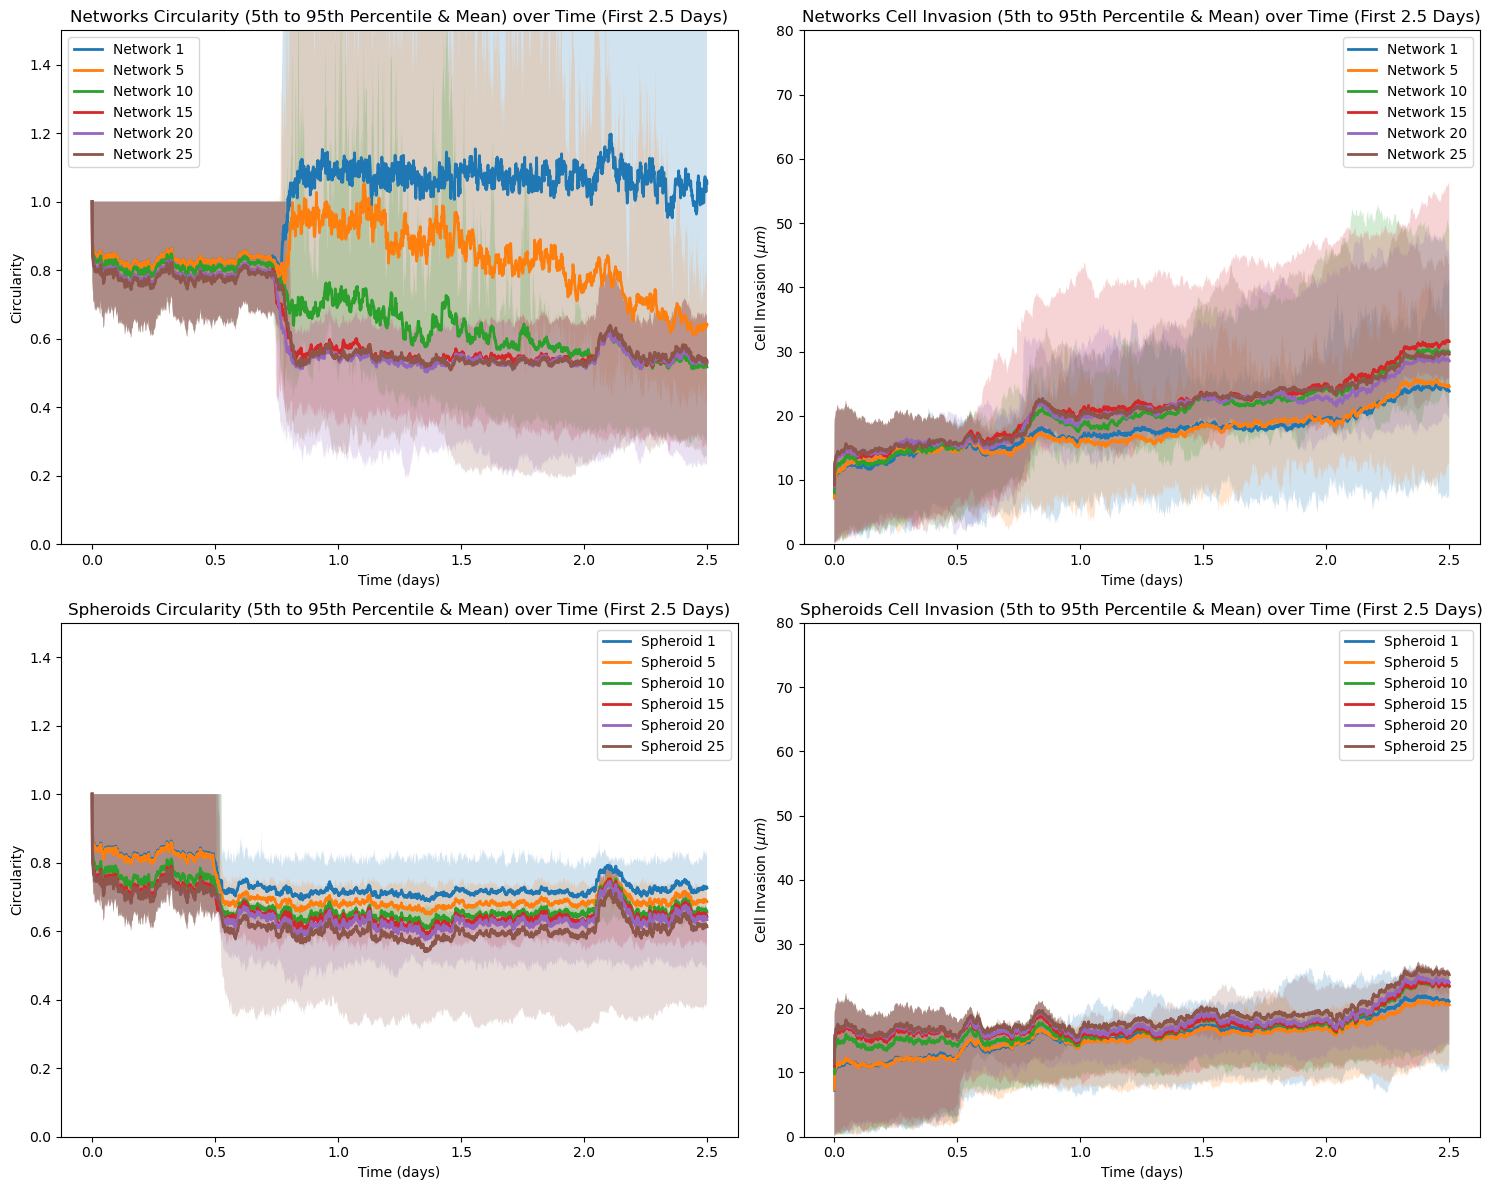

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days
    filtered_data = all_data[all_data['days'] <= 2.5]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by days and folder index, then calculate the 5th, 95th percentiles and the mean
network_analysis = network_data.groupby(['days', 'folder_index']).agg(
    circularity_5th=('circularity', lambda x: np.percentile(x, 5)),
    circularity_95th=('circularity', lambda x: np.percentile(x, 95)),
    circularity_mean=('circularity', 'mean'),
    cell_invasion_5th=('cell_invasion', lambda x: np.percentile(x, 5)),
    cell_invasion_95th=('cell_invasion', lambda x: np.percentile(x, 95)),
    cell_invasion_mean=('cell_invasion', 'mean')
).reset_index()

spheroid_analysis = spheroid_data.groupby(['days', 'folder_index']).agg(
    circularity_5th=('circularity', lambda x: np.percentile(x, 5)),
    circularity_95th=('circularity', lambda x: np.percentile(x, 95)),
    circularity_mean=('circularity', 'mean'),
    cell_invasion_5th=('cell_invasion', lambda x: np.percentile(x, 5)),
    cell_invasion_95th=('cell_invasion', lambda x: np.percentile(x, 95)),
    cell_invasion_mean=('cell_invasion', 'mean')
).reset_index()

# Plotting the percentile range and average

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Networks Circularity
ax[0, 0].set_title('Networks Circularity (5th to 95th Percentile & Mean) over Time (First 2.5 Days)')
ax[0, 0].set_xlabel('Time (days)')
ax[0, 0].set_ylabel('Circularity')
for n in n_values:
    subset = network_analysis[network_analysis['folder_index'] == n]
    ax[0, 0].fill_between(subset['days'], subset['circularity_5th'], subset['circularity_95th'], alpha=0.2)
    ax[0, 0].plot(subset['days'], subset['circularity_mean'], label=f'Network {n}', linewidth=2)
ax[0, 0].legend()
ax[0, 0].set_ylim([0.0, 1.5])

# Plot for Networks Cell Invasion
ax[0, 1].set_title('Networks Cell Invasion (5th to 95th Percentile & Mean) over Time (First 2.5 Days)')
ax[0, 1].set_xlabel('Time (days)')
ax[0, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = network_analysis[network_analysis['folder_index'] == n]
    ax[0, 1].fill_between(subset['days'], subset['cell_invasion_5th'], subset['cell_invasion_95th'], alpha=0.2)
    ax[0, 1].plot(subset['days'], subset['cell_invasion_mean'], label=f'Network {n}', linewidth=2)
ax[0, 1].legend()
ax[0, 1].set_ylim([0.0, 80.0])

# Plot for Spheroids Circularity
ax[1, 0].set_title('Spheroids Circularity (5th to 95th Percentile & Mean) over Time (First 2.5 Days)')
ax[1, 0].set_xlabel('Time (days)')
ax[1, 0].set_ylabel('Circularity')
for n in n_values:
    subset = spheroid_analysis[spheroid_analysis['folder_index'] == n]
    ax[1, 0].fill_between(subset['days'], subset['circularity_5th'], subset['circularity_95th'], alpha=0.2)
    ax[1, 0].plot(subset['days'], subset['circularity_mean'], label=f'Spheroid {n}', linewidth=2)
ax[1, 0].legend()
ax[1, 0].set_ylim([0.0, 1.5])

# Plot for Spheroids Cell Invasion
ax[1, 1].set_title('Spheroids Cell Invasion (5th to 95th Percentile & Mean) over Time (First 2.5 Days)')
ax[1, 1].set_xlabel('Time (days)')
ax[1, 1].set_ylabel('Cell Invasion ($ \mu m$)')
for n in n_values:
    subset = spheroid_analysis[spheroid_analysis['folder_index'] == n]
    ax[1, 1].fill_between(subset['days'], subset['cell_invasion_5th'], subset['cell_invasion_95th'], alpha=0.2)
    ax[1, 1].plot(subset['days'], subset['cell_invasion_mean'], label=f'Spheroid {n}', linewidth=2)
ax[1, 1].legend()
ax[1, 1].set_ylim([0.0, 80.0])

plt.tight_layout()
plt.savefig('percentile_mean_circularity_cell_invasion_networks_spheroids_plot.png', dpi=300, bbox_inches='tight')
plt.show()


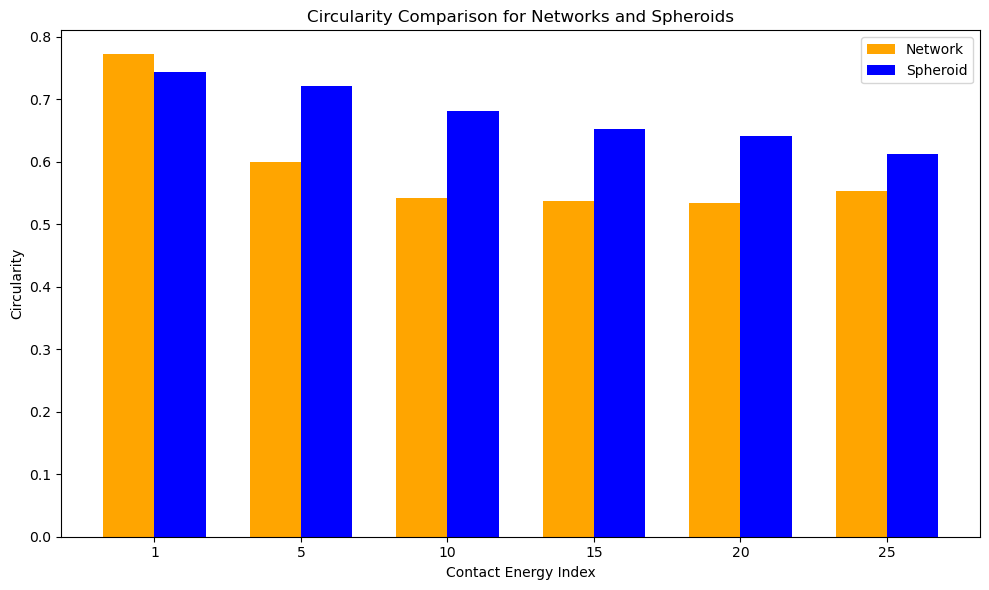

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 7 days
    filtered_data = all_data[all_data['days'] <= 7]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Group by folder index and calculate the mean of circularity
network_avg = network_data.groupby('folder_index')['circularity'].mean().reset_index()
spheroid_avg = spheroid_data.groupby('folder_index')['circularity'].mean().reset_index()

# Merge the averages for plotting
combined_avg = pd.merge(network_avg, spheroid_avg, on='folder_index', suffixes=('_network', '_spheroid'))

# Plotting side-by-side bar plots for circularity
bar_width = 0.35  # Width of the bars
x = np.arange(len(combined_avg))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, combined_avg['circularity_network'], bar_width, label='Network', color='orange')
bars2 = ax.bar(x + bar_width/2, combined_avg['circularity_spheroid'], bar_width, label='Spheroid', color='blue')

# Adding labels and title
ax.set_xlabel('Contact Energy Index')
ax.set_ylabel('Circularity')
ax.set_title('Circularity Comparison for Networks and Spheroids')
ax.set_xticks(x)
ax.set_xticklabels(combined_avg['folder_index'])
ax.legend()

# # Adding value labels on top of the bars
# def add_value_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}', 
#                     xy=(bar.get_x() + bar.get_width() / 2, height), 
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points", 
#                     ha='center', va='bottom')

# add_value_labels(bars1)
# add_value_labels(bars2)

plt.tight_layout()
plt.savefig('circularity_comparison_networks_spheroids.png', dpi=300, bbox_inches='tight')
plt.show()


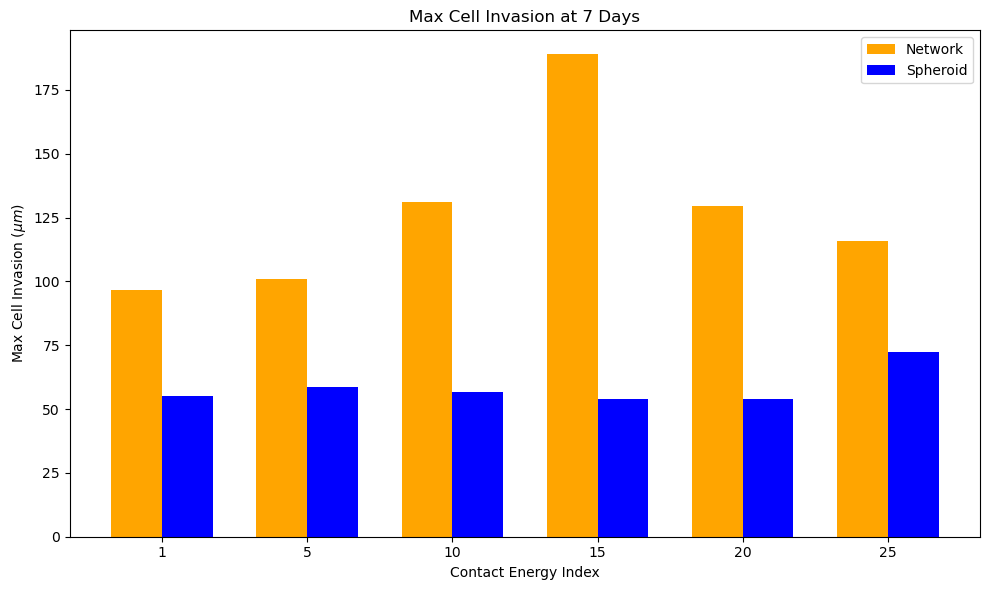

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the last 7 days
    filtered_data = all_data[all_data['days'] <= 7]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Find max cell invasion at the end of 7 days for each contact energy
max_network_invasion = network_data[network_data['days'] == 7].groupby('folder_index')['cell_invasion'].max().reset_index()
max_spheroid_invasion = spheroid_data[spheroid_data['days'] == 7].groupby('folder_index')['cell_invasion'].max().reset_index()

# Merge the results for plotting
combined_invasion = pd.merge(max_network_invasion, max_spheroid_invasion, on='folder_index', suffixes=('_network', '_spheroid'))

# Plotting bar plot for max cell invasion at 7 days
bar_width = 0.35  # Width of the bars
x = np.arange(len(combined_invasion))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, combined_invasion['cell_invasion_network'], bar_width, label='Network', color='orange')
bars2 = ax.bar(x + bar_width/2, combined_invasion['cell_invasion_spheroid'], bar_width, label='Spheroid', color='blue')

ax.set_title('Max Cell Invasion at 7 Days')
ax.set_xlabel('Contact Energy Index')
ax.set_ylabel('Max Cell Invasion ($ \mu m$)')
ax.set_xticks(x)
ax.set_xticklabels(combined_invasion['folder_index'])
ax.legend()

# # Add value labels on top of the bars
# def add_value_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}', 
#                     xy=(bar.get_x() + bar.get_width() / 2, height), 
#                     xytext=(0, 3),  
#                     textcoords="offset points", 
#                     ha='center', va='bottom')

# add_value_labels(bars1)
# add_value_labels(bars2)

plt.tight_layout()
plt.savefig('max_cell_invasion_at_7_days.png', dpi=300, bbox_inches='tight')
plt.show()


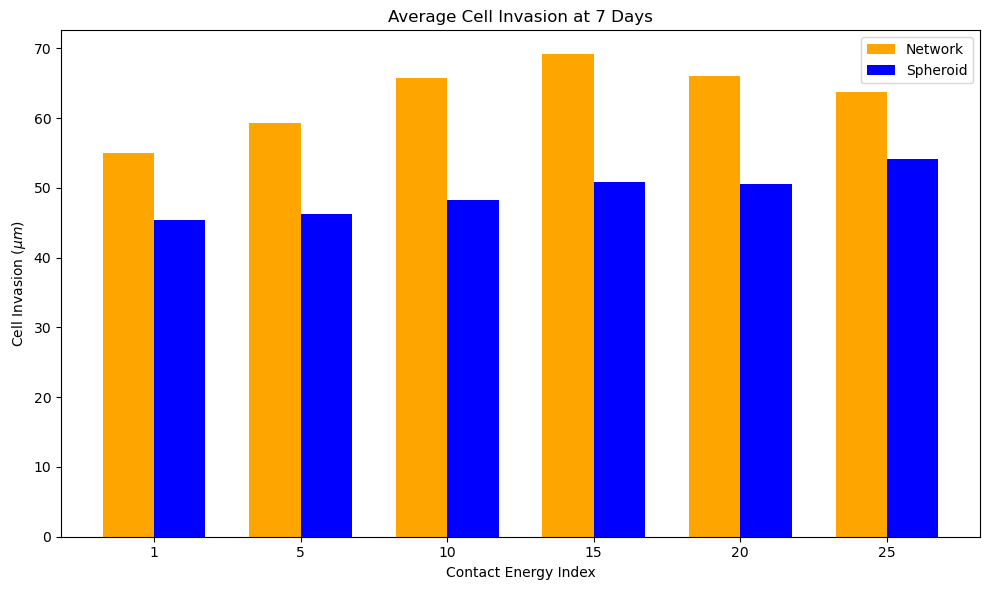

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(base_folder, folder_prefix, file_prefix, n_values, file_count):
    data_list = []

    # Loop through specified n-values (subfolders)
    for n in n_values:
        folder_path = os.path.join(base_folder, f'{folder_prefix}-{n}')

        # Loop through each file in the subfolder (from celldata1 to celldata20)
        for i in range(1, file_count + 1):
            file_path = os.path.join(folder_path, f'{file_prefix}{i}.csv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path)

                # Ensure 'mcs', 'cell_invasion', and 'circularity' columns are numeric
                data['mcs'] = pd.to_numeric(data['mcs'], errors='coerce')
                data['cell_invasion'] = pd.to_numeric(data['cell_invasion'], errors='coerce')
                data['circularity'] = pd.to_numeric(data['circularity'], errors='coerce')

                # Drop rows with missing values in 'mcs', 'cell_invasion', or 'circularity'
                data.dropna(subset=['mcs', 'cell_invasion', 'circularity'], inplace=True)

                # Add an index to identify subfolder and file
                data['folder_index'] = n
                data['file_index'] = i
                data_list.append(data)
            else:
                print(f"File {file_path} not found.")

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to days (1000 mcs = 1 day)
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to experimental value
    all_data['cell_invasion'] *= 2

    # Filter data to include only the last 7 days
    filtered_data = all_data[all_data['days'] <= 7]

    return filtered_data

# Define n-values (subfolders) and file count
n_values = [1, 5, 10, 15, 20, 25]
file_count = 20  # celldata1 to celldata20

# Read and process data from network and spheroid folders
network_data = read_and_process_data('network-contact', 'network', 'celldata', n_values, file_count)
spheroid_data = read_and_process_data('spheroid-contact', 'spheroid', 'celldata', n_values, file_count)

# Calculate the average cell invasion at the end of 7 days for each contact energy
avg_network_invasion = network_data[network_data['days'] == 7].groupby('folder_index')['cell_invasion'].mean().reset_index()
avg_spheroid_invasion = spheroid_data[spheroid_data['days'] == 7].groupby('folder_index')['cell_invasion'].mean().reset_index()

# Merge the results for plotting
combined_invasion = pd.merge(avg_network_invasion, avg_spheroid_invasion, on='folder_index', suffixes=('_network', '_spheroid'))

# Plotting bar plot for average cell invasion at 7 days
bar_width = 0.35  # Width of the bars
x = np.arange(len(combined_invasion))  # The label locations

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, combined_invasion['cell_invasion_network'], bar_width, label='Network', color='orange')
bars2 = ax.bar(x + bar_width/2, combined_invasion['cell_invasion_spheroid'], bar_width, label='Spheroid', color='blue')

ax.set_title('Average Cell Invasion at 7 Days')
ax.set_xlabel('Contact Energy Index')
ax.set_ylabel('Cell Invasion ($ \mu m$)')
ax.set_xticks(x)
ax.set_xticklabels(combined_invasion['folder_index'])
ax.legend()

# # Add value labels on top of the bars
# def add_value_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}', 
#                     xy=(bar.get_x() + bar.get_width() / 2, height), 
#                     xytext=(0, 3),  
#                     textcoords="offset points", 
#                     ha='center', va='bottom')

#add_value_labels(bars1)
#add_value_labels(bars2)

plt.tight_layout()
plt.savefig('avg_cell_invasion_at_7_days.png', dpi=300, bbox_inches='tight')
plt.show()
